In [1]:
import sys, os
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import re
import json
from api_keys import vacation_key, geo_key
import numpy as np
import requests
from pprint import pprint
import gmaps

change dir to resources folder

In [2]:
os.chdir(r'Resources')
print(os.getcwd())

L:\Auto_Opportunity_Analysis\gt-virt-atl-data-pt-09-2021-u-c-b\project\Resources


# read mask coverage data by State by county

In [3]:
df = pd.read_csv(r'mandates_by_county.csv')

df

,state,county,statefips,countyfips,maskdays,days,maskcoverage
0,AL,Autauga County,1,1,267,493,0.54
1,AL,Baldwin County,1,3,267,493,0.54
2,AL,Barbour County,1,5,267,493,0.54
3,AL,Bibb County,1,7,267,493,0.54
4,AL,Blount County,1,9,267,493,0.54
...,...,...,...,...,...,...,...
3228,PR,Villalba Municipio,72,149,490,493,0.99
3229,PR,Yabucoa Municipio,72,151,490,493,0.99
3230,PR,Yauco Municipio,72,153,490,493,0.99
3231,VI,St. Croix Island,78,10,469,493,0.95


# geocode county for gmaps

In [4]:
# ONLY RUN ONCE FOR GEOCODING data
def geocode_county():
    url = f'http://api.positionstack.com/v1/forward?access_key={geo_key}&query={{}}'

    with open(r'mandates_by_county_geocode.csv', 'w') as fw:
        print(f'state,county,lat,lon,statefips,countyfips,maskdays,days,maskcoverage', file=fw)

        for index, row in df.iterrows():
        #     print(index, list(row))
            state = row[0]
            county = row[1].replace(' ', '%20')
            ctyst = f'{county},%20{state}'

            url1 = url.format(ctyst)
        #     print(url1)
            r = requests.get(url1)
            dicy = r.json()
        #     pprint(dicy)

            lat = dicy['data'][0]['latitude']
            lon = dicy['data'][0]['longitude']

            df.loc[index, 'lat'] = lat
            df.loc[index, 'lon'] = lon

            print(f'{row[0]}, {row[1]}, {lat}, {lon}, {row[2]}, {row[3]}, {row[4]}, {row[5]}, {row[6]}', file=fw)
            print(f'{row[0]}, {row[1]}, {lat}, {lon}, {row[2]}, {row[3]}, {row[4]}, {row[5]}, {row[6]}')

            
# geocode_county()

AL, Autauga County, 32.554052, -86.612433, 1, 1, 267, 493, 0.54
AL, Baldwin County, 30.555224, -87.722616, 1, 3, 267, 493, 0.54
AL, Barbour County, 31.886628, -85.316973, 1, 5, 267, 493, 0.54
AL, Bibb County, 32.999816, -87.099134, 1, 7, 267, 493, 0.54
AL, Blount County, 33.957341, -86.562434, 1, 9, 267, 493, 0.54
AL, Bullock County, 32.090565, -85.715577, 1, 11, 267, 493, 0.54
AL, Butler County, 31.743369, -86.692835, 1, 13, 267, 493, 0.54
AL, Calhoun County, 33.767543, -85.820137, 1, 15, 267, 493, 0.54
AL, Chambers County, 32.919517, -85.388963, 1, 17, 267, 493, 0.54
AL, Cherokee County, 34.157619, -85.61899, 1, 19, 267, 493, 0.54
AL, Chilton County, 32.887673, -86.692647, 1, 21, 267, 493, 0.54
AL, Choctaw County, 32.018698, -88.28529, 1, 23, 267, 493, 0.54
AL, Clarke County, 31.720396, -87.830816, 1, 25, 267, 493, 0.54
AL, Clay County, 33.271708, -85.828851, 1, 27, 267, 493, 0.54
AL, Cleburne County, 33.659283, -85.490085, 1, 29, 267, 493, 0.54
AL, Coffee County, 31.399392, -85.9909

AR, Conway County, 35.266454, -92.695994, 5, 29, 254, 493, 0.52
AR, Craighead County, 35.835299, -90.63286, 5, 31, 254, 493, 0.52
AR, Crawford County, 35.588763, -94.243083, 5, 33, 254, 493, 0.52
AR, Crittenden County, 35.250896, -90.308871, 5, 35, 254, 493, 0.52
AR, Cross County, 35.296827, -90.771203, 5, 37, 254, 493, 0.52
AR, Dallas County, 33.976594, -92.654497, 5, 39, 254, 493, 0.52
AR, Desha County, 33.817826, -91.305979, 5, 41, 254, 493, 0.52
AR, Drew County, 33.592724, -91.720038, 5, 43, 254, 493, 0.52
AR, Faulkner County, 35.147406, -92.332068, 5, 45, 254, 493, 0.52
AR, Franklin County, 35.555978, -93.874929, 5, 47, 254, 493, 0.52
AR, Fulton County, 36.377032, -91.818244, 5, 49, 254, 493, 0.52
AR, Garland County, 34.582266, -93.156339, 5, 51, 254, 493, 0.52
AR, Grant County, 34.286745, -92.42359, 5, 53, 254, 493, 0.52
AR, Greene County, 36.114349, -90.559062, 5, 55, 254, 493, 0.52
AR, Hempstead County, 33.731179, -93.663608, 5, 57, 254, 493, 0.52
AR, Hot Spring County, 34.2876

CO, Chaffee County, 38.739991, -106.187125, 8, 15, 261, 493, 0.53
CO, Cheyenne County, 38.826711, -102.603397, 8, 17, 261, 493, 0.53
CO, Clear Creek County, 39.691747, -105.649414, 8, 19, 261, 493, 0.53
CO, Conejos County, 37.197552, -106.191615, 8, 21, 261, 493, 0.53
CO, Costilla County, 37.26814, -105.434264, 8, 23, 261, 493, 0.53
CO, Crowley County, 38.317224, -103.781057, 8, 25, 261, 493, 0.53
CO, Custer County, 38.089727, -105.367354, 8, 27, 261, 493, 0.53
CO, Delta County, 38.871041, -107.871326, 8, 29, 261, 493, 0.53
CO, Denver County, 39.740959, -104.985798, 8, 31, 261, 493, 0.53
CO, Dolores County, 37.763455, -108.517172, 8, 33, 261, 493, 0.53
CO, Douglas County, 39.347936, -104.92316, 8, 35, 261, 493, 0.53
CO, Eagle County, 39.641401, -106.695346, 8, 37, 261, 493, 0.53
CO, Elbert County, 39.347038, -104.135887, 8, 39, 261, 493, 0.53
CO, El Paso County, 38.82466, -104.525611, 8, 41, 261, 493, 0.53
CO, Fremont County, 38.479432, -105.439745, 8, 43, 261, 493, 0.53
CO, Garfield C

FL, Suwannee County, 30.220942, -82.971531, 12, 121, 0, 493, 0.0
FL, Taylor County, 30.080585, -83.612552, 12, 123, 0, 493, 0.0
FL, Union County, 30.045033, -82.389149, 12, 125, 0, 493, 0.0
FL, Volusia County, 29.052386, -81.156198, 12, 127, 0, 493, 0.0
FL, Wakulla County, 30.13428, -84.369293, 12, 129, 0, 493, 0.0
FL, Walton County, 30.539767, -86.176806, 12, 131, 0, 493, 0.0
FL, Washington County, 30.591757, -85.665345, 12, 133, 0, 493, 0.0
GA, Appling County, 31.76143, -82.288886, 13, 1, 0, 493, 0.0
GA, Atkinson County, 31.293286, -82.900629, 13, 3, 0, 493, 0.0
GA, Bacon County, 31.531514, -82.41639, 13, 5, 0, 493, 0.0
GA, Baker County, 31.328362, -84.448461, 13, 7, 0, 493, 0.0
GA, Baldwin County, 33.076077, -83.253499, 13, 9, 0, 493, 0.0
GA, Banks County, 34.372422, -83.500524, 13, 11, 0, 493, 0.0
GA, Barrow County, 33.979397, -83.715263, 13, 13, 0, 493, 0.0
GA, Bartow County, 34.240028, -84.840482, 13, 15, 0, 493, 0.0
GA, Ben Hill County, 31.762654, -83.215757, 13, 17, 0, 493, 0.0

GA, Spalding County, 33.270901, -84.301088, 13, 255, 0, 493, 0.0
GA, Stephens County, 34.563, -83.310951, 13, 257, 0, 493, 0.0
GA, Stewart County, 32.07707, -84.835163, 13, 259, 0, 493, 0.0
GA, Sumter County, 32.036886, -84.197003, 13, 261, 0, 493, 0.0
GA, Talbot County, 32.70593, -84.532978, 13, 263, 0, 493, 0.0
GA, Taliaferro County, 33.544236, -82.908869, 13, 265, 0, 493, 0.0
GA, Tattnall County, 32.023998, -82.08144, 13, 267, 0, 493, 0.0
GA, Taylor County, 32.560069, -84.255389, 13, 269, 0, 493, 0.0
GA, Telfair County, 31.930934, -82.938937, 13, 271, 0, 493, 0.0
GA, Terrell County, 31.780873, -84.434217, 13, 273, 0, 493, 0.0
GA, Thomas County, 30.868976, -83.906536, 13, 275, 0, 493, 0.0
GA, Tift County, 31.451801, -83.529723, 13, 277, 0, 493, 0.0
GA, Toombs County, 32.123182, -82.328447, 13, 279, 0, 493, 0.0
GA, Towns County, 34.910671, -83.723683, 13, 281, 0, 493, 0.0
GA, Treutlen County, 32.415711, -82.570738, 13, 283, 0, 493, 0.0
GA, Troup County, 33.031088, -85.028403, 13, 285,

IL, Lawrence County, 38.709198, -87.743391, 17, 101, 406, 493, 0.82
IL, Johnson County, 37.466295, -88.880886, 17, 87, 406, 493, 0.82
IL, Livingston County, 40.918482, -88.506622, 17, 105, 406, 493, 0.82
IL, McDonough County, 40.45513, -90.677924, 17, 109, 406, 493, 0.82
IL, Kankakee County, 41.14943, -87.861822, 17, 91, 406, 493, 0.82
IL, Knox County, 40.932858, -90.213247, 17, 95, 406, 493, 0.82
IL, McLean County, 40.518948, -88.798771, 17, 113, 406, 493, 0.82
IL, LaSalle County, 41.367891, -88.885945, 17, 99, 406, 493, 0.82
IL, Macoupin County, 39.260447, -89.924396, 17, 117, 406, 493, 0.82
IL, Marion County, 38.650643, -88.918966, 17, 121, 406, 493, 0.82
IL, Lee County, 41.736472, -89.30041, 17, 103, 406, 493, 0.82
IL, Mason County, 40.285608, -89.879609, 17, 125, 406, 493, 0.82
IL, Logan County, 40.120934, -89.364495, 17, 107, 406, 493, 0.82
IL, Menard County, 40.012505, -89.822996, 17, 129, 406, 493, 0.82
IL, Monroe County, 38.267614, -90.193606, 17, 133, 406, 493, 0.82
IL, McHen

IN, St. Joseph County, 41.618957, -86.289909, 18, 141, 253, 493, 0.51
IN, Scott County, 38.691918, -85.760315, 18, 143, 253, 493, 0.51
IN, Shelby County, 39.524566, -85.791699, 18, 145, 253, 493, 0.51
IN, Spencer County, 38.017109, -87.003925, 18, 147, 253, 493, 0.51
IN, Starke County, 41.302375, -86.601254, 18, 149, 253, 493, 0.51
IN, Steuben County, 41.643611, -85.000789, 18, 151, 253, 493, 0.51
IN, Sullivan County, 39.092429, -87.41072, 18, 153, 253, 493, 0.51
IN, Switzerland County, 38.825552, -85.053922, 18, 155, 253, 493, 0.51
IN, Tippecanoe County, 40.388239, -86.894103, 18, 157, 253, 493, 0.51
IN, Tipton County, 40.311532, -86.051854, 18, 159, 253, 493, 0.51
IN, Union County, 39.625493, -84.92515, 18, 161, 253, 493, 0.51
IN, Vanderburgh County, 38.071401, -87.588152, 18, 163, 253, 493, 0.51
IN, Vermillion County, 39.852064, -87.456716, 18, 165, 253, 493, 0.51
IN, Vigo County, 39.433518, -87.385932, 18, 167, 253, 493, 0.51
IN, Wabash County, 40.847975, -85.791956, 18, 169, 253, 

KS, Brown County, 39.826555, -95.564224, 20, 13, 271, 493, 0.55
KS, Butler County, 37.780897, -96.839086, 20, 15, 271, 493, 0.55
KS, Chase County, 38.304087, -96.593911, 20, 17, 271, 493, 0.55
KS, Chautauqua County, 37.149957, -96.245379, 20, 19, 271, 493, 0.55
KS, Cherokee County, 37.16918, -94.846275, 20, 21, 271, 493, 0.55
KS, Cheyenne County, 39.78565, -101.731103, 20, 23, 271, 493, 0.55
KS, Clark County, 37.234834, -99.820273, 20, 25, 271, 493, 0.55
KS, Clay County, 39.349956, -97.165186, 20, 27, 271, 493, 0.55
KS, Cloud County, 39.480085, -97.649289, 20, 29, 271, 493, 0.55
KS, Coffey County, 38.236624, -95.734117, 20, 31, 271, 493, 0.55
KS, Comanche County, 37.191151, -99.271883, 20, 33, 271, 493, 0.55
KS, Cowley County, 37.237677, -96.837529, 20, 35, 271, 493, 0.55
KS, Crawford County, 37.506916, -94.851815, 20, 37, 271, 493, 0.55
KS, Decatur County, 39.784683, -100.459906, 20, 39, 271, 493, 0.55
KS, Dickinson County, 38.861528, -97.156002, 20, 41, 271, 493, 0.55
KS, Doniphan Co

KY, Clinton County, 36.729947, -85.132976, 21, 53, 336, 493, 0.68
KY, Crittenden County, 37.350499, -88.101584, 21, 55, 336, 493, 0.68
KY, Cumberland County, 36.799195, -85.365598, 21, 57, 336, 493, 0.68
KY, Daviess County, 37.677042, -87.091691, 21, 59, 336, 493, 0.68
KY, Edmonson County, 37.214607, -86.238627, 21, 61, 336, 493, 0.68
KY, Elliott County, 38.107936, -83.120328, 21, 63, 336, 493, 0.68
KY, Estill County, 37.684616, -83.978109, 21, 65, 336, 493, 0.68
KY, Fayette County, 38.056966, -84.474459, 21, 67, 336, 493, 0.68
KY, Fleming County, 38.384786, -83.6785, 21, 69, 336, 493, 0.68
KY, Floyd County, 37.571671, -82.748636, 21, 71, 336, 493, 0.68
KY, Franklin County, 38.243175, -84.891913, 21, 73, 336, 493, 0.68
KY, Fulton County, 36.575703, -89.144076, 21, 75, 336, 493, 0.68
KY, Gallatin County, 38.745809, -84.862039, 21, 77, 336, 493, 0.68
KY, Garrard County, 37.647183, -84.54068, 21, 79, 336, 493, 0.68
KY, Grant County, 38.660417, -84.621667, 21, 81, 336, 493, 0.68
KY, Graves

LA, Livingston Parish, 30.477022, -90.747279, 22, 63, 301, 493, 0.61
LA, Madison Parish, 32.382959, -91.26846, 22, 65, 301, 493, 0.61
LA, Morehouse Parish, 32.823699, -91.795598, 22, 67, 301, 493, 0.61
LA, Natchitoches Parish, 31.734234, -93.156414, 22, 69, 301, 493, 0.61
LA, Orleans Parish, 30.056708, -89.889852, 22, 71, 301, 493, 0.61
LA, Ouachita Parish, 32.443382, -92.159758, 22, 73, 301, 493, 0.61
LA, Plaquemines Parish, 29.3807, -89.391304, 22, 75, 301, 493, 0.61
LA, Pointe Coupee Parish, 30.622975, -91.618243, 22, 77, 301, 493, 0.61
LA, Rapides Parish, 31.176671, -92.569947, 22, 79, 301, 493, 0.61
LA, Red River Parish, 32.097063, -93.323091, 22, 81, 301, 493, 0.61
LA, Richland Parish, 32.447403, -91.767978, 22, 83, 301, 493, 0.61
LA, Sabine Parish, 31.545664, -93.532745, 22, 85, 301, 493, 0.61
LA, St. Bernard Parish, 29.903173, -89.304053, 22, 87, 301, 493, 0.61
LA, St. Charles Parish, 29.924943, -90.392957, 22, 89, 301, 493, 0.61
LA, St. Helena Parish, 30.824597, -90.707019, 22

MI, Midland County, 43.648719, -84.39105, 26, 111, 419, 493, 0.85
MI, Ionia County, 42.945496, -85.074575, 26, 67, 419, 493, 0.85
MI, Iosco County, 44.340494, -83.087218, 26, 69, 419, 493, 0.85
MI, Isabella County, 43.640243, -84.846823, 26, 73, 419, 493, 0.85
MI, Muskegon County, 43.295739, -86.535163, 26, 121, 419, 493, 0.85
MI, Jackson County, 42.24756, -84.423409, 26, 75, 419, 493, 0.85
MI, Keweenaw County, 47.792549, -88.404873, 26, 83, 419, 493, 0.85
MI, Kalkaska County, 44.684584, -85.090237, 26, 79, 419, 493, 0.85
MI, Oceana County, 43.646281, -86.581547, 26, 127, 419, 493, 0.85
MI, Kent County, 43.031225, -85.549315, 26, 81, 419, 493, 0.85
MI, Lake County, 43.98937, -85.801663, 26, 85, 419, 493, 0.85
MI, Lapeer County, 43.08616, -83.218602, 26, 87, 419, 493, 0.85
MI, Osceola County, 43.989594, -85.325292, 26, 133, 419, 493, 0.85
MI, Lenawee County, 41.893875, -84.066315, 26, 91, 419, 493, 0.85
MI, Ottawa County, 42.943094, -86.422012, 26, 139, 419, 493, 0.85
MI, Livingston Cou

MN, Wadena County, 46.586949, -94.96943, 27, 159, 294, 493, 0.6
MN, Waseca County, 44.022026, -93.587258, 27, 161, 294, 493, 0.6
MN, Washington County, 44.986714, -92.881274, 27, 163, 294, 493, 0.6
MN, Watonwan County, 43.978575, -94.61405, 27, 165, 294, 493, 0.6
MN, Wilkin County, 46.356096, -96.442198, 27, 167, 294, 493, 0.6
MN, Winona County, 44.020093, -91.905893, 27, 169, 294, 493, 0.6
MN, Wright County, 45.182465, -93.970115, 27, 171, 294, 493, 0.6
MN, Yellow Medicine County, 44.752908, -95.723776, 27, 173, 294, 493, 0.6
MS, Adams County, 31.482035, -91.328785, 28, 1, 101, 493, 0.2
MS, Alcorn County, 34.875863, -88.580269, 28, 3, 154, 493, 0.31
MS, Amite County, 31.174429, -90.804442, 28, 5, 147, 493, 0.3
MS, Attala County, 33.108169, -89.581571, 28, 7, 154, 493, 0.31
MS, Benton County, 34.815269, -89.191663, 28, 9, 171, 493, 0.35
MS, Bolivar County, 33.841747, -90.8284, 28, 11, 170, 493, 0.34
MS, Calhoun County, 33.92671, -89.33396, 28, 13, 149, 493, 0.3
MS, Carroll County, 33.4

MO, Greene County, 37.25796, -93.341981, 29, 77, 0, 493, 0.0
MO, Grundy County, 40.114533, -93.565335, 29, 79, 0, 493, 0.0
MO, Harrison County, 40.354153, -93.992047, 29, 81, 0, 493, 0.0
MO, Henry County, 38.384514, -93.792743, 29, 83, 0, 493, 0.0
MO, Hickory County, 37.936247, -93.320733, 29, 85, 0, 493, 0.0
MO, Holt County, 40.115035, -95.211237, 29, 87, 0, 493, 0.0
MO, Howard County, 39.147863, -92.696263, 29, 89, 0, 493, 0.0
MO, Howell County, 36.774943, -91.886553, 29, 91, 0, 493, 0.0
MO, Iron County, 37.5331, -90.665494, 29, 93, 0, 493, 0.0
MO, Jackson County, 39.007407, -94.341278, 29, 95, 0, 493, 0.0
MO, Jasper County, 37.20451, -94.340611, 29, 97, 0, 493, 0.0
MO, Jefferson County, 38.269371, -90.569155, 29, 99, 0, 493, 0.0
MO, Johnson County, 38.748486, -93.759718, 29, 101, 0, 493, 0.0
MO, Knox County, 40.128807, -92.148051, 29, 103, 0, 493, 0.0
MO, Laclede County, 37.651383, -92.626748, 29, 105, 0, 493, 0.0
MO, Lafayette County, 39.068337, -93.785569, 29, 107, 0, 493, 0.0
MO,

MT, Toole County, 48.682186, -111.65876, 30, 101, 212, 493, 0.43
MT, Treasure County, 46.196761, -107.239394, 30, 103, 212, 493, 0.43
MT, Valley County, 48.480355, -106.682919, 30, 105, 212, 493, 0.43
MT, Wheatland County, 46.46466, -109.844429, 30, 107, 212, 493, 0.43
MT, Wibaux County, 46.836909, -104.226075, 30, 109, 212, 493, 0.43
MT, Yellowstone County, 45.796879, -108.446125, 30, 111, 212, 493, 0.43
NE, Adams County, 40.524497, -98.501203, 31, 1, 0, 493, 0.0
NE, Antelope County, 42.176254, -98.066654, 31, 3, 0, 493, 0.0
NE, Arthur County, 41.568908, -101.695917, 31, 5, 0, 493, 0.0
NE, Banner County, 41.545424, -103.710489, 31, 7, 0, 493, 0.0
NE, Blaine County, 41.912356, -99.976909, 31, 9, 0, 493, 0.0
NE, Boone County, 41.714714, -98.070362, 31, 11, 0, 493, 0.0
NE, Box Butte County, 42.22037, -103.085655, 31, 13, 0, 493, 0.0
NE, Boyd County, 42.913253, -98.766541, 31, 15, 0, 493, 0.0
NE, Brown County, 42.42682, -99.925886, 31, 17, 0, 493, 0.0
NE, Buffalo County, 40.851615, -99.07

NM, Bernalillo County, 35.044079, -106.784721, 35, 1, 458, 493, 0.93
NJ, Camden County, 39.824674, -74.990236, 34, 7, 413, 493, 0.84
NJ, Cape May County, 39.033564, -74.879239, 34, 9, 413, 493, 0.84
NJ, Cumberland County, 39.298674, -75.134968, 34, 11, 413, 493, 0.84
NJ, Essex County, 40.790057, -74.244868, 34, 13, 413, 493, 0.84
NJ, Gloucester County, 39.768876, -75.184755, 34, 15, 413, 493, 0.84
NJ, Hudson County, 40.72429, -74.074545, 34, 17, 413, 493, 0.84
NJ, Hunterdon County, 40.568576, -74.928974, 34, 19, 413, 493, 0.84
NJ, Mercer County, 40.280843, -74.705223, 34, 21, 413, 493, 0.84
NJ, Middlesex County, 40.434519, -74.376623, 34, 23, 413, 493, 0.84
NJ, Monmouth County, 40.319115, -74.092018, 34, 25, 413, 493, 0.84
NJ, Morris County, 40.890666, -74.497532, 34, 27, 413, 493, 0.84
NJ, Ocean County, 39.896538, -74.226209, 34, 29, 413, 493, 0.84
NJ, Passaic County, 41.094551, -74.330195, 34, 31, 413, 493, 0.84
NJ, Salem County, 39.599547, -75.39585, 34, 33, 413, 493, 0.84
NJ, Somer

NC, Burke County, 35.747333, -81.725805, 37, 23, 322, 493, 0.65
NC, Cabarrus County, 35.36893, -80.547308, 37, 25, 322, 493, 0.65
NC, Caldwell County, 35.960836, -81.551088, 37, 27, 322, 493, 0.65
NC, Camden County, 36.276815, -76.056979, 37, 29, 322, 493, 0.65
NC, Carteret County, 34.850092, -76.492746, 37, 31, 322, 493, 0.65
NC, Caswell County, 36.393527, -79.333609, 37, 33, 322, 493, 0.65
NC, Catawba County, 35.685218, -81.220242, 37, 35, 322, 493, 0.65
NC, Chatham County, 35.708406, -79.28158, 37, 37, 322, 493, 0.65
NC, Cherokee County, 35.125724, -84.069533, 37, 39, 322, 493, 0.65
NC, Chowan County, 36.163742, -76.658955, 37, 41, 322, 493, 0.65
NC, Clay County, 35.067197, -83.729077, 37, 43, 322, 493, 0.65
NC, Cleveland County, 35.316739, -81.559815, 37, 45, 322, 493, 0.65
NC, Columbus County, 34.265853, -78.692861, 37, 47, 322, 493, 0.65
NC, Craven County, 35.228147, -77.144537, 37, 49, 322, 493, 0.65
NC, Cumberland County, 35.033901, -78.833317, 37, 51, 322, 493, 0.65
NC, Currit

ND, Ransom County, 46.456105, -97.65741, 38, 73, 66, 493, 0.13
ND, Renville County, 48.707334, -101.664982, 38, 75, 66, 493, 0.13
ND, Richland County, 46.253842, -96.953092, 38, 77, 66, 493, 0.13
ND, Rolette County, 48.772042, -99.840938, 38, 79, 66, 493, 0.13
ND, Sargent County, 46.108858, -97.630704, 38, 81, 66, 493, 0.13
ND, Sheridan County, 47.587397, -100.341378, 38, 83, 66, 493, 0.13
ND, Sioux County, 46.16802, -100.842344, 38, 85, 66, 493, 0.13
ND, Slope County, 46.454866, -103.459928, 38, 87, 66, 493, 0.13
ND, Stark County, 46.805578, -102.655071, 38, 89, 66, 493, 0.13
ND, Steele County, 47.456121, -97.724638, 38, 91, 66, 493, 0.13
ND, Stutsman County, 46.978731, -98.958861, 38, 93, 66, 493, 0.13
ND, Towner County, 48.685124, -99.245806, 38, 95, 66, 493, 0.13
ND, Traill County, 47.455429, -97.161523, 38, 97, 66, 493, 0.13
ND, Walsh County, 48.368986, -97.7214, 38, 99, 66, 493, 0.13
ND, Ward County, 48.153515, -101.541843, 38, 101, 66, 493, 0.13
ND, Wells County, 47.587108, -99.

OK, Garfield County, 36.378979, -97.782742, 40, 47, 0, 493, 0.0
OK, Garvin County, 34.681067, -97.375948, 40, 49, 0, 493, 0.0
OK, Grady County, 35.018661, -97.881235, 40, 51, 0, 493, 0.0
OK, Grant County, 36.796047, -97.786153, 40, 53, 0, 493, 0.0
OK, Greer County, 34.939359, -99.554593, 40, 55, 0, 493, 0.0
OK, Harmon County, 34.740911, -99.859797, 40, 57, 0, 493, 0.0
OK, Harper County, 36.796645, -99.667361, 40, 59, 0, 493, 0.0
OK, Haskell County, 35.196629, -95.084459, 40, 61, 0, 493, 0.0
OK, Hughes County, 35.0576, -96.270876, 40, 63, 0, 493, 0.0
OK, Jackson County, 34.578668, -99.475643, 40, 65, 0, 493, 0.0
OK, Jefferson County, 34.119021, -97.811359, 40, 67, 0, 493, 0.0
OK, Johnston County, 34.336452, -96.665711, 40, 69, 0, 493, 0.0
OK, Kay County, 36.825058, -97.167679, 40, 71, 0, 493, 0.0
OK, Kingfisher County, 35.945299, -97.942104, 40, 73, 0, 493, 0.0
OK, Kiowa County, 34.922937, -98.988331, 40, 75, 0, 493, 0.0
OK, Latimer County, 34.869195, -95.250415, 40, 77, 0, 493, 0.0
OK,

PA, Monroe County, 41.0603, -75.334235, 42, 89, 435, 493, 0.88
PA, Lebanon County, 40.36095, -76.483514, 42, 75, 435, 493, 0.88
PA, Lehigh County, 40.615831, -75.596584, 42, 77, 435, 493, 0.88
PA, Luzerne County, 41.154991, -75.982305, 42, 79, 435, 493, 0.88
PA, Lycoming County, 41.310186, -77.103699, 42, 81, 435, 493, 0.88
PA, McKean County, 41.814431, -78.568981, 42, 83, 435, 493, 0.88
PA, Montgomery County, 40.210793, -75.372446, 42, 91, 435, 493, 0.88
PA, Mercer County, 41.30471, -80.257722, 42, 85, 435, 493, 0.88
PA, Mifflin County, 40.645015, -77.591081, 42, 87, 435, 493, 0.88
PA, Montour County, 41.0346, -76.681953, 42, 93, 435, 493, 0.88
RI, Newport County, 41.505701, -71.266734, 44, 5, 424, 493, 0.86
PA, Northampton County, 40.729287, -75.311591, 42, 95, 435, 493, 0.88
SC, Abbeville County, 34.227589, -82.454959, 45, 1, 0, 493, 0.0
PA, Northumberland County, 40.816221, -76.681323, 42, 97, 435, 493, 0.88
PA, Perry County, 40.405276, -77.256678, 42, 99, 435, 493, 0.88
PA, Philad

SD, Moody County, 44.021987, -96.670907, 46, 101, 0, 493, 0.0
SD, Oglala Lakota County, 43.343636, -102.551627, 46, 102, 0, 493, 0.0
SD, Pennington County, 43.913806, -102.465956, 46, 103, 0, 493, 0.0
SD, Perkins County, 45.492281, -102.475611, 46, 105, 0, 493, 0.0
SD, Potter County, 45.072088, -99.957244, 46, 107, 0, 493, 0.0
SD, Roberts County, 45.702738, -97.028866, 46, 109, 0, 493, 0.0
SD, Sanborn County, 44.023493, -98.091381, 46, 111, 0, 493, 0.0
SD, Spink County, 44.93719, -98.346173, 46, 115, 0, 493, 0.0
SD, Stanley County, 44.417856, -100.8325, 46, 117, 0, 493, 0.0
SD, Sully County, 44.723043, -100.132168, 46, 119, 0, 493, 0.0
SD, Todd County, 43.193902, -100.71845, 46, 121, 0, 493, 0.0
SD, Tripp County, 43.32465, -99.888656, 46, 123, 0, 493, 0.0
SD, Turner County, 43.33376, -97.161392, 46, 125, 0, 493, 0.0
SD, Union County, 42.929728, -96.674049, 46, 127, 0, 493, 0.0
SD, Walworth County, 45.420195, -100.03158, 46, 129, 0, 493, 0.0
SD, Yankton County, 43.016864, -97.391582, 46

TX, Bowie County, 33.445655, -94.522274, 48, 37, 250, 493, 0.51
TX, Brazoria County, 29.120005, -95.406398, 48, 39, 250, 493, 0.51
TX, Brazos County, 30.691464, -96.319957, 48, 41, 250, 493, 0.51
TX, Brewster County, 29.843571, -103.251738, 48, 43, 250, 493, 0.51
TX, Briscoe County, 34.529972, -101.208598, 48, 45, 250, 493, 0.51
TX, Brooks County, 27.033323, -98.204094, 48, 47, 250, 493, 0.51
TX, Brown County, 31.755478, -98.978105, 48, 49, 250, 493, 0.51
TX, Burleson County, 30.482322, -96.626695, 48, 51, 250, 493, 0.51
TX, Burnet County, 30.80787, -98.176411, 48, 53, 250, 493, 0.51
TX, Caldwell County, 29.831661, -97.624416, 48, 55, 250, 493, 0.51
TX, Calhoun County, 28.479612, -96.569173, 48, 57, 250, 493, 0.51
TX, Callahan County, 32.297522, -99.373491, 48, 59, 250, 493, 0.51
TX, Cameron County, 26.126188, -97.421491, 48, 61, 250, 493, 0.51
TX, Camp County, 32.989648, -94.982542, 48, 63, 250, 493, 0.51
TX, Carson County, 35.403341, -101.354182, 48, 65, 250, 493, 0.51
TX, Cass Count

TX, Lavaca County, 29.372542, -96.923681, 48, 285, 250, 493, 0.51
TX, Lee County, 30.275345, -96.91338, 48, 287, 250, 493, 0.51
TX, Leon County, 31.29973, -96.000898, 48, 289, 250, 493, 0.51
TX, Liberty County, 30.163058, -94.855259, 48, 291, 250, 493, 0.51
TX, Limestone County, 31.548562, -96.575317, 48, 293, 250, 493, 0.51
TX, Lipscomb County, 36.277783, -100.273121, 48, 295, 250, 493, 0.51
TX, Live Oak County, 28.335474, -98.129793, 48, 297, 250, 493, 0.51
TX, Llano County, 30.710246, -98.684095, 48, 299, 250, 493, 0.51
TX, Loving County, 31.82594, -103.507934, 48, 301, 250, 493, 0.51
TX, Lubbock County, 33.61004, -101.820546, 48, 303, 250, 493, 0.51
TX, Lynn County, 33.176908, -101.816139, 48, 305, 250, 493, 0.51
TX, McCulloch County, 31.178587, -99.333794, 48, 307, 250, 493, 0.51
TX, McLennan County, 31.550496, -97.201797, 48, 309, 250, 493, 0.51
TX, McMullen County, 28.352709, -98.567846, 48, 311, 250, 493, 0.51
TX, Madison County, 30.973164, -95.934461, 48, 313, 250, 493, 0.51
T

UT, Kane County, 37.268529, -111.887945, 49, 25, 160, 493, 0.32
UT, Millard County, 39.063949, -113.100411, 49, 27, 178, 493, 0.36
UT, Morgan County, 41.089478, -111.632263, 49, 29, 178, 493, 0.36
UT, Piute County, 38.330859, -112.126925, 49, 31, 160, 493, 0.32
UT, Rich County, 41.622172, -111.225606, 49, 33, 160, 493, 0.32
UT, Salt Lake County, 40.636951, -111.966207, 49, 35, 178, 493, 0.36
UT, San Juan County, 37.614702, -109.664491, 49, 37, 178, 493, 0.36
UT, Sanpete County, 39.334572, -111.530554, 49, 39, 178, 493, 0.36
UT, Sevier County, 38.76756, -111.816101, 49, 41, 178, 493, 0.36
UT, Summit County, 40.861066, -111.230352, 49, 43, 178, 493, 0.36
UT, Tooele County, 40.452387, -113.131041, 49, 45, 178, 493, 0.36
UT, Uintah County, 40.127877, -109.511721, 49, 47, 178, 493, 0.36
UT, Utah County, 40.210261, -111.773078, 49, 49, 178, 493, 0.36
UT, Wasatch County, 40.351507, -111.102258, 49, 51, 178, 493, 0.36
UT, Washington County, 37.263053, -113.504959, 49, 53, 178, 493, 0.36
UT, Wa

VA, Westmoreland County, 38.070947, -76.681619, 51, 193, 351, 493, 0.71
VA, Wythe County, 36.898347, -81.14826, 51, 197, 351, 493, 0.71
VA, Wise County, 37.057464, -82.6257, 51, 195, 351, 493, 0.71
VA, Bristol city, 36.59649, -82.18847, 51, 520, 351, 493, 0.71
VA, York County, 37.17931, -76.44807, 51, 199, 351, 493, 0.71
VA, Alexandria city, 38.80484, -77.04692, 51, 510, 351, 493, 0.71
VA, Buena Vista city, 37.73417, -79.354692, 51, 530, 351, 493, 0.71
VA, Charlottesville city, 38.036141, -78.482369, 51, 540, 351, 493, 0.71
VA, Chesapeake city, 39.528633, -75.809703, 51, 550, 351, 493, 0.71
VA, Covington city, 36.835947, -76.131106, 51, 580, 351, 493, 0.71
VA, Danville city, 36.835947, -76.131106, 51, 590, 351, 493, 0.71
VA, Colonial Heights city, 37.73086, -78.376655, 51, 570, 351, 493, 0.71
VA, Emporia city, 36.69512, -77.535614, 51, 595, 351, 493, 0.71
VA, Fairfax city, 36.835947, -76.131106, 51, 600, 351, 493, 0.71
VA, Falls Church city, 38.886493, -77.176065, 51, 610, 351, 493, 0.

WV, Roane County, 38.710125, -81.367129, 54, 87, 348, 493, 0.71
WV, Summers County, 37.57329, -80.879927, 54, 89, 348, 493, 0.71
WV, Taylor County, 39.321741, -80.043211, 54, 91, 348, 493, 0.71
WV, Tucker County, 39.112241, -79.570178, 54, 93, 348, 493, 0.71
WV, Tyler County, 39.47696, -80.881023, 54, 95, 348, 493, 0.71
WV, Upshur County, 38.877036, -80.22996, 54, 97, 348, 493, 0.71
WV, Wayne County, 38.15558, -82.430369, 54, 99, 348, 493, 0.71
WV, Webster County, 38.493956, -80.421897, 54, 101, 348, 493, 0.71
WV, Wetzel County, 39.594373, -80.644358, 54, 103, 348, 493, 0.71
WV, Wirt County, 39.028027, -81.378638, 54, 105, 348, 493, 0.71
WV, Wood County, 39.231743, -81.468, 54, 107, 348, 493, 0.71
WV, Wyoming County, 37.63219, -81.522709, 54, 109, 348, 493, 0.71
WI, Adams County, 43.969455, -89.774758, 55, 1, 242, 493, 0.49
WI, Ashland County, 47.051207, -90.444297, 55, 3, 242, 493, 0.49
WI, Barron County, 45.42367, -91.84835, 55, 5, 242, 493, 0.49
WI, Bayfield County, 46.670227, -91.2

PR, Arecibo Municipio, 18.445726, -66.741514, 72, 13, 490, 493, 0.99
PR, Salinas Municipio, 17.97886, -66.295309, 72, 123, 490, 493, 0.99
PR, Arroyo Municipio, 17.964699, -66.06216, 72, 15, 490, 493, 0.99
VI, St. Thomas Island, 18.339224, -64.901939, 78, 30, 469, 493, 0.95
PR, Barceloneta Municipio, 18.447478, -66.542641, 72, 17, 490, 493, 0.99
PR, Barranquitas Municipio, 18.183788, -66.312345, 72, 19, 490, 493, 0.99
PR, Bayamón Municipio, 18.39856, -66.15572, 72, 21, 490, 493, 0.99
PR, Cabo Rojo Municipio, 18.093661, -67.155188, 72, 23, 490, 493, 0.99
PR, Caguas Municipio, 18.23598, -66.030975, 72, 25, 490, 493, 0.99
PR, Camuy Municipio, 18.48303, -66.853423, 72, 27, 490, 493, 0.99
PR, Canóvanas Municipio, 18.37773, -65.90628, 72, 29, 490, 493, 0.99
PR, Carolina Municipio, 18.399299, -65.969759, 72, 31, 490, 493, 0.99
PR, Cataño Municipio, 18.44134, -66.11822, 72, 33, 490, 493, 0.99
PR, Cayey Municipio, 18.11191, -66.171175, 72, 35, 490, 493, 0.99
PR, Ceiba Municipio, 18.263662, -65.6

# read from stored output

In [5]:
df = pd.read_csv(r'mandates_by_county_geocode.csv')

df

,state,county,lat,lon,statefips,countyfips,maskdays,days,maskcoverage
0,AL,Autauga County,32.554052,-86.612433,1,1,267,493,0.54
1,AL,Baldwin County,30.555224,-87.722616,1,3,267,493,0.54
2,AL,Barbour County,31.886628,-85.316973,1,5,267,493,0.54
3,AL,Bibb County,32.999816,-87.099134,1,7,267,493,0.54
4,AL,Blount County,33.957341,-86.562434,1,9,267,493,0.54
...,...,...,...,...,...,...,...,...,...
3228,PR,Villalba Municipio,18.127288,-66.476973,72,149,490,493,0.99
3229,PR,Yabucoa Municipio,18.046734,-65.878242,72,151,490,493,0.99
3230,PR,Yauco Municipio,18.032586,-66.863306,72,153,490,493,0.99
3231,VI,St. Croix Island,17.746706,-64.779172,78,10,469,493,0.95


# plot heatmap of mask mandates over period

In [6]:
gmaps.configure(api_key=vacation_key)

locs = df[['lat', 'lon']]
maskdays = df['maskdays'] 

fig = gmaps.figure()

# add heat layer and set max intensity to max mask days
heat = gmaps.heatmap_layer(locs, weights=maskdays, dissipating=False, max_intensity=maskdays.max(), point_radius = 0.6)
fig.add_layer(heat)

fig

Figure(layout=FigureLayout(height='420px'))

# merge mask mandates and presidential votes return data

format columns and for merge

In [7]:
df['statefips'] = df['statefips'].map('{:0>2d}'.format)
df['countyfips'] = df['countyfips'].map('{:0>3d}'.format)
df['countyfips'] = df['statefips'] + df['countyfips']

df = df.drop(columns='statefips')
df['county'] =  df['county'].map(lambda x: x.upper())
                                 
df

,state,county,lat,lon,countyfips,maskdays,days,maskcoverage
0,AL,AUTAUGA COUNTY,32.554052,-86.612433,01001,267,493,0.54
1,AL,BALDWIN COUNTY,30.555224,-87.722616,01003,267,493,0.54
2,AL,BARBOUR COUNTY,31.886628,-85.316973,01005,267,493,0.54
3,AL,BIBB COUNTY,32.999816,-87.099134,01007,267,493,0.54
4,AL,BLOUNT COUNTY,33.957341,-86.562434,01009,267,493,0.54
...,...,...,...,...,...,...,...,...
3228,PR,VILLALBA MUNICIPIO,18.127288,-66.476973,72149,490,493,0.99
3229,PR,YABUCOA MUNICIPIO,18.046734,-65.878242,72151,490,493,0.99
3230,PR,YAUCO MUNICIPIO,18.032586,-66.863306,72153,490,493,0.99
3231,VI,ST. CROIX ISLAND,17.746706,-64.779172,78010,469,493,0.95


read elections return data by county by year

In [8]:
df1 = pd.read_csv(r'countypres_2000-2020.csv')

df1

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2020,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,7503.0,27770.0,20210622,TOTAL
1,2020,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,OTHER,OTHER,429.0,27770.0,20210622,TOTAL
2,2020,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,DONALD J TRUMP,REPUBLICAN,19838.0,27770.0,20210622,TOTAL
3,2020,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,24578.0,109679.0,20210622,TOTAL
4,2020,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,OTHER,OTHER,1557.0,109679.0,20210622,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
72612,2000,ALASKA,AK,DISTRICT 40,2040.0,PRESIDENT,OTHER,OTHER,119.0,3226.0,20191203,TOTAL
72613,2000,ALASKA,NaN,DISTRICT 99,2099.0,PRESIDENT,AL GORE,DEMOCRAT,NaN,0.0,20191203,TOTAL
72614,2000,ALASKA,NaN,DISTRICT 99,2099.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,NaN,0.0,20191203,TOTAL
72615,2000,ALASKA,NaN,DISTRICT 99,2099.0,PRESIDENT,RALPH NADER,GREEN,NaN,0.0,20191203,TOTAL


select time frame before covid and after covid for comparison

In [9]:
df1 = df1[df1['year'] > 2015]

df1

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2020,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,7503.0,27770.0,20210622,TOTAL
1,2020,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,OTHER,OTHER,429.0,27770.0,20210622,TOTAL
2,2020,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,DONALD J TRUMP,REPUBLICAN,19838.0,27770.0,20210622,TOTAL
3,2020,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,24578.0,109679.0,20210622,TOTAL
4,2020,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,OTHER,OTHER,1557.0,109679.0,20210622,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
31562,2016,ALASKA,AK,DISTRICT 40,2040.0,PRESIDENT,DONALD TRUMP,REPUBLICAN,1377.0,4610.0,20191203,TOTAL
31563,2016,ALASKA,AK,DISTRICT 40,2040.0,PRESIDENT,OTHER,OTHER,895.0,4610.0,20191203,TOTAL
31564,2016,ALASKA,NaN,DISTRICT 99,2099.0,PRESIDENT,HILLARY CLINTON,DEMOCRAT,274.0,5056.0,20191203,TOTAL
31565,2016,ALASKA,NaN,DISTRICT 99,2099.0,PRESIDENT,DONALD TRUMP,REPUBLICAN,40.0,5056.0,20191203,TOTAL


get only democrat and repub rows

In [10]:
df1 = df1[df1['party'] != 'OTHER'].reset_index(drop=True)

df1

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2020,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,7503.0,27770.0,20210622,TOTAL
1,2020,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,DONALD J TRUMP,REPUBLICAN,19838.0,27770.0,20210622,TOTAL
2,2020,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,24578.0,109679.0,20210622,TOTAL
3,2020,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,DONALD J TRUMP,REPUBLICAN,83544.0,109679.0,20210622,TOTAL
4,2020,ALABAMA,AL,BARBOUR,1005.0,PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,4816.0,10518.0,20210622,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
24378,2016,ALASKA,AK,DISTRICT 39,2039.0,PRESIDENT,DONALD TRUMP,REPUBLICAN,1405.0,5639.0,20191203,TOTAL
24379,2016,ALASKA,AK,DISTRICT 40,2040.0,PRESIDENT,HILLARY CLINTON,DEMOCRAT,2338.0,4610.0,20191203,TOTAL
24380,2016,ALASKA,AK,DISTRICT 40,2040.0,PRESIDENT,DONALD TRUMP,REPUBLICAN,1377.0,4610.0,20191203,TOTAL
24381,2016,ALASKA,NaN,DISTRICT 99,2099.0,PRESIDENT,HILLARY CLINTON,DEMOCRAT,274.0,5056.0,20191203,TOTAL


pick out relevant cols and rename

In [11]:
df2 = df1[['year', 'state_po', 'county_name', 'county_fips', 'party', 'candidatevotes', 'totalvotes']]
df2.columns = ['year', 'state', 'county', 'countyfips', 'party', 'votes', 'totvotes']

df2

,year,state,county,countyfips,party,votes,totvotes
0,2020,AL,AUTAUGA,1001.0,DEMOCRAT,7503.0,27770.0
1,2020,AL,AUTAUGA,1001.0,REPUBLICAN,19838.0,27770.0
2,2020,AL,BALDWIN,1003.0,DEMOCRAT,24578.0,109679.0
3,2020,AL,BALDWIN,1003.0,REPUBLICAN,83544.0,109679.0
4,2020,AL,BARBOUR,1005.0,DEMOCRAT,4816.0,10518.0
...,...,...,...,...,...,...,...
24378,2016,AK,DISTRICT 39,2039.0,REPUBLICAN,1405.0,5639.0
24379,2016,AK,DISTRICT 40,2040.0,DEMOCRAT,2338.0,4610.0
24380,2016,AK,DISTRICT 40,2040.0,REPUBLICAN,1377.0,4610.0
24381,2016,NaN,DISTRICT 99,2099.0,DEMOCRAT,274.0,5056.0


drop na rows

In [12]:
df2 = df2.dropna().reset_index(drop=True)

df2

,year,state,county,countyfips,party,votes,totvotes
0,2020,AL,AUTAUGA,1001.0,DEMOCRAT,7503.0,27770.0
1,2020,AL,AUTAUGA,1001.0,REPUBLICAN,19838.0,27770.0
2,2020,AL,BALDWIN,1003.0,DEMOCRAT,24578.0,109679.0
3,2020,AL,BALDWIN,1003.0,REPUBLICAN,83544.0,109679.0
4,2020,AL,BARBOUR,1005.0,DEMOCRAT,4816.0,10518.0
...,...,...,...,...,...,...,...
24357,2016,AK,DISTRICT 38,2038.0,REPUBLICAN,1143.0,5095.0
24358,2016,AK,DISTRICT 39,2039.0,DEMOCRAT,3142.0,5639.0
24359,2016,AK,DISTRICT 39,2039.0,REPUBLICAN,1405.0,5639.0
24360,2016,AK,DISTRICT 40,2040.0,DEMOCRAT,2338.0,4610.0


create proportion of votes var

In [13]:
df2['voteperc'] = df2['votes'] / df2['totvotes']

df2

,year,state,county,countyfips,party,votes,totvotes,voteperc
0,2020,AL,AUTAUGA,1001.0,DEMOCRAT,7503.0,27770.0,0.270184
1,2020,AL,AUTAUGA,1001.0,REPUBLICAN,19838.0,27770.0,0.714368
2,2020,AL,BALDWIN,1003.0,DEMOCRAT,24578.0,109679.0,0.224090
3,2020,AL,BALDWIN,1003.0,REPUBLICAN,83544.0,109679.0,0.761714
4,2020,AL,BARBOUR,1005.0,DEMOCRAT,4816.0,10518.0,0.457882
...,...,...,...,...,...,...,...,...
24357,2016,AK,DISTRICT 38,2038.0,REPUBLICAN,1143.0,5095.0,0.224338
24358,2016,AK,DISTRICT 39,2039.0,DEMOCRAT,3142.0,5639.0,0.557191
24359,2016,AK,DISTRICT 39,2039.0,REPUBLICAN,1405.0,5639.0,0.249158
24360,2016,AK,DISTRICT 40,2040.0,DEMOCRAT,2338.0,4610.0,0.507158


format all columns

In [14]:
df2['countyfips'] = df2['countyfips'].map(int).map('{:0>5d}'.format)

df2

,year,state,county,countyfips,party,votes,totvotes,voteperc
0,2020,AL,AUTAUGA,01001,DEMOCRAT,7503.0,27770.0,0.270184
1,2020,AL,AUTAUGA,01001,REPUBLICAN,19838.0,27770.0,0.714368
2,2020,AL,BALDWIN,01003,DEMOCRAT,24578.0,109679.0,0.224090
3,2020,AL,BALDWIN,01003,REPUBLICAN,83544.0,109679.0,0.761714
4,2020,AL,BARBOUR,01005,DEMOCRAT,4816.0,10518.0,0.457882
...,...,...,...,...,...,...,...,...
24357,2016,AK,DISTRICT 38,02038,REPUBLICAN,1143.0,5095.0,0.224338
24358,2016,AK,DISTRICT 39,02039,DEMOCRAT,3142.0,5639.0,0.557191
24359,2016,AK,DISTRICT 39,02039,REPUBLICAN,1405.0,5639.0,0.249158
24360,2016,AK,DISTRICT 40,02040,DEMOCRAT,2338.0,4610.0,0.507158


merge mask mandates and presidential votes data then drop dup cols

In [15]:
df3 = df2.merge(df, how='inner', on=['state', 'countyfips'], suffixes=('','_y'))
df3 = df3.drop(columns='county_y')

df3

,year,state,county,countyfips,party,votes,totvotes,voteperc,lat,lon,maskdays,days,maskcoverage
0,2020,AL,AUTAUGA,01001,DEMOCRAT,7503.0,27770.0,0.270184,32.554052,-86.612433,267,493,0.54
1,2020,AL,AUTAUGA,01001,REPUBLICAN,19838.0,27770.0,0.714368,32.554052,-86.612433,267,493,0.54
2,2016,AL,AUTAUGA,01001,DEMOCRAT,5936.0,24973.0,0.237697,32.554052,-86.612433,267,493,0.54
3,2016,AL,AUTAUGA,01001,REPUBLICAN,18172.0,24973.0,0.727666,32.554052,-86.612433,267,493,0.54
4,2020,AL,BALDWIN,01003,DEMOCRAT,24578.0,109679.0,0.224090,30.555224,-87.722616,267,493,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24120,2016,WY,WESTON,56045,REPUBLICAN,3033.0,3526.0,0.860182,43.841038,-104.567826,66,493,0.13
24121,2016,CA,SAN JOAQUIN,06077,DEMOCRAT,121124.0,224166.0,0.540332,37.961720,-121.277745,424,493,0.86
24122,2016,CA,SAN JOAQUIN,06077,REPUBLICAN,88936.0,224166.0,0.396742,37.961720,-121.277745,424,493,0.86
24123,2016,DC,DISTRICT OF COLUMBIA,11001,DEMOCRAT,282830.0,311268.0,0.908638,38.912097,-77.014683,386,493,0.78


# Combine dem and rep rows into by State by county

separate into two dfs

In [16]:
dfd = df3[df3['party'] == 'DEMOCRAT'].reset_index(drop=True)
dfr = df3[df3['party'] == 'REPUBLICAN'].reset_index(drop=True)

combine dfs in by State by county

In [17]:
dfnew = dfd.merge(dfr, left_index=True, right_index=True, suffixes=('','_r'))
dfnew['dmargin'] = dfnew['voteperc'] - dfnew['voteperc_r']

dfnew

,year,state,county,countyfips,party,votes,totvotes,voteperc,lat,lon,...,party_r,votes_r,totvotes_r,voteperc_r,lat_r,lon_r,maskdays_r,days_r,maskcoverage_r,dmargin
0,2020,AL,AUTAUGA,01001,DEMOCRAT,7503.0,27770.0,0.270184,32.554052,-86.612433,...,REPUBLICAN,19838.0,27770.0,0.714368,32.554052,-86.612433,267,493,0.54,-0.444184
1,2016,AL,AUTAUGA,01001,DEMOCRAT,5936.0,24973.0,0.237697,32.554052,-86.612433,...,REPUBLICAN,18172.0,24973.0,0.727666,32.554052,-86.612433,267,493,0.54,-0.489969
2,2020,AL,BALDWIN,01003,DEMOCRAT,24578.0,109679.0,0.224090,30.555224,-87.722616,...,REPUBLICAN,83544.0,109679.0,0.761714,30.555224,-87.722616,267,493,0.54,-0.537623
3,2016,AL,BALDWIN,01003,DEMOCRAT,18458.0,95215.0,0.193856,30.555224,-87.722616,...,REPUBLICAN,72883.0,95215.0,0.765457,30.555224,-87.722616,267,493,0.54,-0.571601
4,2020,AL,BARBOUR,01005,DEMOCRAT,4816.0,10518.0,0.457882,31.886628,-85.316973,...,REPUBLICAN,5622.0,10518.0,0.534512,31.886628,-85.316973,267,493,0.54,-0.076631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8183,2016,WY,WASHAKIE,56043,DEMOCRAT,532.0,3814.0,0.139486,43.916244,-107.538740,...,REPUBLICAN,2911.0,3814.0,0.763241,43.916244,-107.538740,66,493,0.13,-0.623755
8184,2020,WY,WESTON,56045,DEMOCRAT,360.0,3560.0,0.101124,43.841038,-104.567826,...,REPUBLICAN,3107.0,3560.0,0.872753,43.841038,-104.567826,66,493,0.13,-0.771629
8185,2016,WY,WESTON,56045,DEMOCRAT,299.0,3526.0,0.084799,43.841038,-104.567826,...,REPUBLICAN,3033.0,3526.0,0.860182,43.841038,-104.567826,66,493,0.13,-0.775383
8186,2016,CA,SAN JOAQUIN,06077,DEMOCRAT,121124.0,224166.0,0.540332,37.961720,-121.277745,...,REPUBLICAN,88936.0,224166.0,0.396742,37.961720,-121.277745,424,493,0.86,0.143590


# plot dem party heatmap since 2016

In [18]:
# Democrat
dfd2020 = dfnew[dfnew['dmargin'] > 0]

gmaps.configure(api_key=vacation_key)

locs = dfd2020[['lat', 'lon']]
dmargin = dfd2020['dmargin'] * 100

fig = gmaps.figure()

# add heat layer and set max intensity to max mask days
heat = gmaps.heatmap_layer(locs, weights=dmargin, dissipating=False, max_intensity=dmargin.max(), point_radius = 1)
fig.add_layer(heat)

fig

Figure(layout=FigureLayout(height='420px'))

# plot rep party heatmap since 2016

In [19]:
#REPUBLICAN
dfd2016 = dfnew[dfnew['dmargin'] < 0]

gmaps.configure(api_key=vacation_key)

locs = dfd2016[['lat', 'lon']]
dmargin = dfd2016['dmargin'] * 100 * - 1

fig = gmaps.figure()

# add heat layer and set max intensity to max mask days
heat = gmaps.heatmap_layer(locs, weights=dmargin, dissipating=False, max_intensity=dmargin.max() * 4, point_radius = 1)
fig.add_layer(heat)

fig

Figure(layout=FigureLayout(height='420px'))

# regress to uncover relationship between political alignment and mask mandates

In [20]:
dfnew

,year,state,county,countyfips,party,votes,totvotes,voteperc,lat,lon,...,party_r,votes_r,totvotes_r,voteperc_r,lat_r,lon_r,maskdays_r,days_r,maskcoverage_r,dmargin
0,2020,AL,AUTAUGA,01001,DEMOCRAT,7503.0,27770.0,0.270184,32.554052,-86.612433,...,REPUBLICAN,19838.0,27770.0,0.714368,32.554052,-86.612433,267,493,0.54,-0.444184
1,2016,AL,AUTAUGA,01001,DEMOCRAT,5936.0,24973.0,0.237697,32.554052,-86.612433,...,REPUBLICAN,18172.0,24973.0,0.727666,32.554052,-86.612433,267,493,0.54,-0.489969
2,2020,AL,BALDWIN,01003,DEMOCRAT,24578.0,109679.0,0.224090,30.555224,-87.722616,...,REPUBLICAN,83544.0,109679.0,0.761714,30.555224,-87.722616,267,493,0.54,-0.537623
3,2016,AL,BALDWIN,01003,DEMOCRAT,18458.0,95215.0,0.193856,30.555224,-87.722616,...,REPUBLICAN,72883.0,95215.0,0.765457,30.555224,-87.722616,267,493,0.54,-0.571601
4,2020,AL,BARBOUR,01005,DEMOCRAT,4816.0,10518.0,0.457882,31.886628,-85.316973,...,REPUBLICAN,5622.0,10518.0,0.534512,31.886628,-85.316973,267,493,0.54,-0.076631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8183,2016,WY,WASHAKIE,56043,DEMOCRAT,532.0,3814.0,0.139486,43.916244,-107.538740,...,REPUBLICAN,2911.0,3814.0,0.763241,43.916244,-107.538740,66,493,0.13,-0.623755
8184,2020,WY,WESTON,56045,DEMOCRAT,360.0,3560.0,0.101124,43.841038,-104.567826,...,REPUBLICAN,3107.0,3560.0,0.872753,43.841038,-104.567826,66,493,0.13,-0.771629
8185,2016,WY,WESTON,56045,DEMOCRAT,299.0,3526.0,0.084799,43.841038,-104.567826,...,REPUBLICAN,3033.0,3526.0,0.860182,43.841038,-104.567826,66,493,0.13,-0.775383
8186,2016,CA,SAN JOAQUIN,06077,DEMOCRAT,121124.0,224166.0,0.540332,37.961720,-121.277745,...,REPUBLICAN,88936.0,224166.0,0.396742,37.961720,-121.277745,424,493,0.86,0.143590


define regression function to be reused

In [21]:
def reg_plot(x_l, y_l):
    x = np.array(x_l)
    y = np.array(y_l)

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='#000000', linewidth ='3', label = '{:.2f} * x + {:.2f}'.format(m, b))
    plt.legend()
    
    return m, b

create data and fig variables

In [22]:
color = ['#043070', '#700804']

x = dfnew['dmargin'] * 100
y = dfnew['maskcoverage'] * 100
xy = zip(x, y)

dem = {}
rep = {}
for percvote, percmask in xy:
    if percvote >= 0:
        dem[percvote] = percmask
    else:
        rep[percvote] = percmask

# plot mask mandates against politcal alignment since 2016

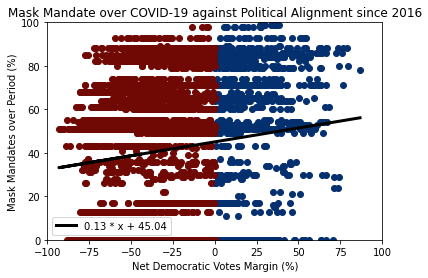

In [23]:
plt.scatter(dem.keys(), dem.values(), c=color[0])
plt.scatter(rep.keys(), rep.values(), c=color[1])

plt.title('Mask Mandate over COVID-19 against Political Alignment since 2016')
plt.xlabel('Net Democratic Votes Margin (%)')
plt.ylabel('Mask Mandates over Period (%)')
plt.xlim(-100,100)
plt.ylim(0,100)

corr = reg_plot(x, y)

plt.savefig('mandates_votes_overall.png', dpi=200)
plt.show()

separate data into 2016 and 2020

In [24]:
dfnew2020 = dfnew[dfnew['year'] == 2020]
dfnew2016 = dfnew[dfnew['year'] == 2016]

# plot mask mandates against 2020 political alignment

In [25]:
x = dfnew2020['dmargin'] * 100
y = dfnew2020['maskcoverage'] * 100
xy = zip(x, y)

dem = {}
rep = {}
for percvote, percmask in xy:
    if percvote >= 0:
        dem[percvote] = percmask
    else:
        rep[percvote] = percmask

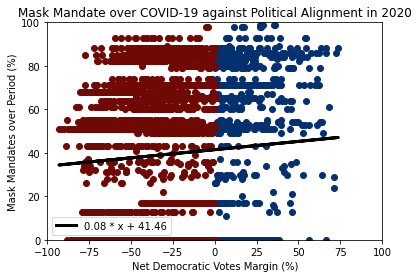

In [26]:
plt.scatter(dem.keys(), dem.values(), c=color[0])
plt.scatter(rep.keys(), rep.values(), c=color[1])

plt.title('Mask Mandate over COVID-19 against Political Alignment in 2020')
plt.xlabel('Net Democratic Votes Margin (%)')
plt.ylabel('Mask Mandates over Period (%)')
plt.xlim(-100,100)
plt.ylim(0,100)

corr = reg_plot(x, y)

plt.savefig('mandates_votes_2020.png', dpi=200)
plt.show()

# plot mask mandates against 2016 political alignment

In [27]:
x = dfnew2016['dmargin'] * 100
y = dfnew2016['maskcoverage'] * 100
xy = zip(x, y)

dem = {}
rep = {}
for percvote, percmask in xy:
    if percvote >= 0:
        dem[percvote] = percmask
    else:
        rep[percvote] = percmask

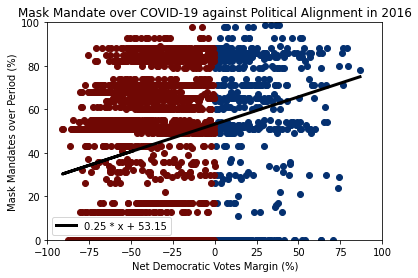

In [28]:
plt.scatter(dem.keys(), dem.values(), c=color[0])
plt.scatter(rep.keys(), rep.values(), c=color[1])

plt.title('Mask Mandate over COVID-19 against Political Alignment in 2016')
plt.xlabel('Net Democratic Votes Margin (%)')
plt.ylabel('Mask Mandates over Period (%)')
plt.xlim(-100,100)
plt.ylim(0,100)

corr = reg_plot(x, y)

plt.savefig('mandates_votes_2016.png', dpi=200)
plt.show()